In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
import itertools
import swifter

c:\programdata\miniconda3\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
df_lyrics = pd.read_csv("data/lyrics.csv", sep =';')

df_lyrics[:5]

,ALink,SName,SLink,Lyric,ParentGenre,Genres,Genres_API
0,/andre-drake/,Bae ft. V.P Rap,/andre-drake/bae-ft-v-p-rap.html,[André Drake]. Minha princesa eu troco tudo pr...,Black Music,"Black Music, Hip Hop, Rap","Black Music, Hip Hop, Rap"
1,/andre-drake/,By Chance (Brazilian Remix),/andre-drake/by-chance-brazilian-remix.html,"[Refrão]. Mais views, pode ser?. Cê sabe, que ...",Black Music,"Black Music, Hip Hop, Rap","Black Music, Hip Hop, Rap"
2,/andre-drake/,Casa do Terror,/andre-drake/casa-do-terror.html,"4 Paredes uma jaula, na minha mão uma faca. Um...",Black Music,"Black Music, Hip Hop, Rap","Black Music, Hip Hop, Rap"
3,/andre-drake/,Na Madrugada,/andre-drake/na-madrugada.html,"[Refrão 1]. Na ""madruga"" não consigo dormir. m...",Black Music,"Black Music, Hip Hop, Rap","Black Music, Hip Hop, Rap"
4,/andre-drake/,V.P Convida Parte 2,/andre-drake/v-p-convida-parte-2.html,[Vp Rap]. Vp de novo que convida. Dessa vez se...,Black Music,"Black Music, Hip Hop, Rap","Black Music, Hip Hop, Rap"


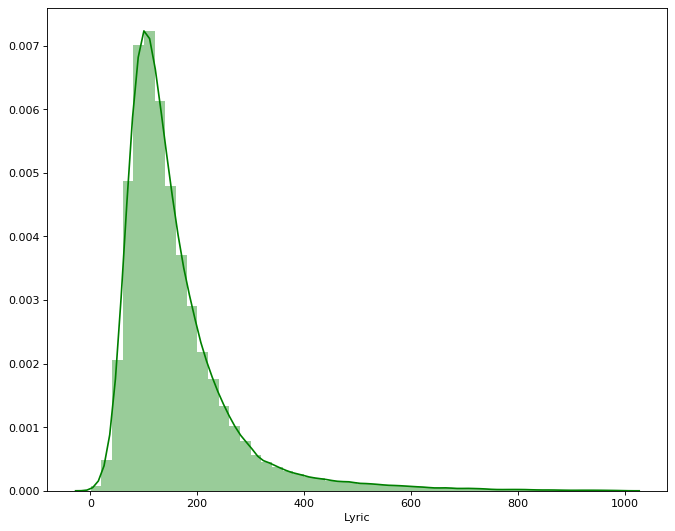

In [3]:
len_serie = df_lyrics["Lyric"].str.split(' ').map(lambda x: len(x))
fig=plt.figure(figsize=(10, 8), dpi= 80)
sns.distplot(len_serie[len_serie<1000], color="g")

In [10]:
#def map_genre(arr):
#    arr.sort()
#    return ', '.join(arr)

#df_lyrics["Genres_API"] = df_lyrics["Genres_API"].str.split(', ').map(map_genre)

serie_genres_b = df_lyrics["Genres_API"].value_counts()
df_genres = pd.DataFrame({"Genres":serie_genres_b.index, "Count": serie_genres_b}).reset_index(drop=True)

df_genres["Genres"] = df_genres["Genres"].str.split(', ')

df_genres[0:5]

,Genres,Count
0,[Gospel/Religioso],3564
1,[Sertanejo],1722
2,[Romântico],940
3,"[MPB, Samba Enredo, Samba, Axé, Velha Guarda, ...",776
4,"[Gospel/Religioso, Instrumental, Jovem Guarda,...",692


In [11]:
genres = {}
for i in df_genres.index:
    genres_arr = df_genres["Genres"][i]
    for genre in genres_arr:
        genres[genre] = ''
genres = np.sort(list(genres.keys()))
genres

array(['Axé', 'Black Music', 'Blues', 'Bossa Nova', 'Chillout',
       'Classic Rock', 'Clássico', 'Country', 'Dance', 'Disco',
       'Electro Swing', 'Electronica', 'Emocore', 'Fado', 'Folk', 'Forró',
       'Funk', 'Funk Carioca', 'Gospel/Religioso', 'Grunge', 'Gótico',
       'Hard Rock', 'Hardcore', 'Heavy Metal', 'Hip Hop', 'House',
       'Indie', 'Industrial', 'Infantil', 'Instrumental', 'J-Pop/J-Rock',
       'Jazz', 'Jovem Guarda', 'K-Pop/K-Rock', 'Kizomba', 'MPB', 'Metal',
       'Músicas Gaúchas', 'New Age', 'New Wave', 'Pagode', 'Piano Rock',
       'Pop', 'Pop/Punk', 'Pop/Rock', 'Post-Rock', 'Power-Pop',
       'Progressivo', 'Psicodelia', 'Punk Rock', 'Pós-Punk', 'R&B', 'Rap',
       'Reggae', 'Reggaeton', 'Regional', 'Rock', 'Rock Alternativo',
       'Rockabilly', 'Romântico', 'Samba', 'Samba Enredo', 'Sertanejo',
       'Ska', 'Soft Rock', 'Soul Music', 'Surf Music', 'Tecnopop',
       'Trance', 'Trilha Sonora', 'Trip-Hop', 'Tropical House',
       'Velha Guarda', 'Wo

In [12]:
df_or = pd.DataFrame(columns=genres, index =genres).fillna(0)
df_and = pd.DataFrame(columns=genres, index =genres).fillna(0)

In [44]:
def process(linha):
 
    genres_arr = linha['Genres']
    count      = linha['Count']
    
    global df_or
    global df_and
    
    df = pd.DataFrame(columns=genres, index =genres).fillna(0)
    for genre in genres_arr:
        
        df[genre] = count
        df.loc[genre:genre] = count
        df_and[genre][genre] += count
        
    df_or = df_or.add(df)
    for subset in itertools.combinations(genres_arr, 2):
        df_and[subset[0]][subset[1]] += count
        df_and[subset[1]][subset[0]] += count
    
       
start = time.time()    
df_genres.apply(lambda linha: process(linha), axis =1)
end = time.time()

df_corr = df_and/df_or

print('\nTime(s): '+str("%.2f" % (end - start)+'s\n'))


Time(s): 91.17s



In [45]:
df_corr = df_corr.round(3)
df_corr

,Axé,Black Music,Blues,Bossa Nova,Chillout,Classic Rock,Clássico,Country,Dance,Disco,...,Soft Rock,Soul Music,Surf Music,Tecnopop,Trance,Trilha Sonora,Trip-Hop,Tropical House,Velha Guarda,World Music
Axé,1.000,0.432,0.314,0.354,0.091,0.080,0.383,0.342,0.343,0.253,...,0.061,0.094,0.074,0.062,0.049,0.324,0.067,0.017,0.236,0.197
Black Music,0.432,1.000,0.373,0.391,0.152,0.090,0.324,0.347,0.373,0.268,...,0.093,0.147,0.126,0.095,0.085,0.336,0.119,0.031,0.250,0.223
Blues,0.314,0.373,1.000,0.342,0.172,0.122,0.311,0.273,0.270,0.252,...,0.118,0.136,0.147,0.087,0.093,0.302,0.129,0.028,0.225,0.277
Bossa Nova,0.354,0.391,0.342,1.000,0.132,0.115,0.352,0.283,0.301,0.267,...,0.086,0.134,0.107,0.075,0.072,0.309,0.091,0.029,0.331,0.250
Chillout,0.091,0.152,0.172,0.132,1.000,0.094,0.129,0.125,0.132,0.114,...,0.078,0.073,0.114,0.061,0.122,0.141,0.099,0.051,0.142,0.143
Classic Rock,0.080,0.090,0.122,0.115,0.094,1.000,0.093,0.107,0.111,0.082,...,0.132,0.109,0.092,0.068,0.108,0.115,0.082,0.061,0.082,0.131
Clássico,0.383,0.324,0.311,0.352,0.129,0.093,1.000,0.263,0.300,0.300,...,0.074,0.101,0.099,0.071,0.062,0.318,0.096,0.017,0.270,0.237
Country,0.342,0.347,0.273,0.283,0.125,0.107,0.263,1.000,0.343,0.297,...,0.115,0.122,0.105,0.109,0.090,0.326,0.117,0.029,0.237,0.233
Dance,0.343,0.373,0.270,0.301,0.132,0.111,0.300,0.343,1.000,0.302,...,0.117,0.147,0.118,0.126,0.096,0.359,0.124,0.032,0.195,0.225
Disco,0.253,0.268,0.252,0.267,0.114,0.082,0.300,0.297,0.302,1.000,...,0.087,0.135,0.107,0.121,0.054,0.300,0.120,0.027,0.233,0.268


In [16]:
columns = []
for i in df_corr.columns:
    for j in df_corr.columns:
        if(i!=j):
            if(df_corr[i][j]>0.4 and i not in columns):
                columns.append(i)
columns

['Axé',
 'Black Music',
 'Bossa Nova',
 'Country',
 'Electronica',
 'Forró',
 'Funk',
 'Funk Carioca',
 'Gospel/Religioso',
 'MPB',
 'Pagode',
 'Pop/Rock',
 'Rock',
 'Romântico',
 'Samba',
 'Sertanejo']

In [17]:
df = df_corr[columns].loc[columns]

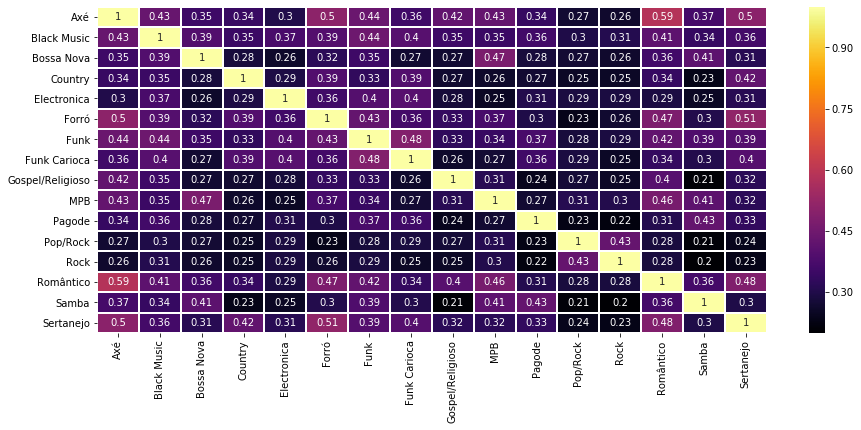

In [18]:

fig, ax = plt.subplots(figsize=(15,6))   
sns.heatmap(df.round(4), cmap = 'inferno', annot=True, linewidth = 1)
plt.show()

In [19]:
df_lyrics["SizeGenres"] = df_lyrics["Genres"].str.split(',').map(lambda x: len(x))
df_lyrics["SizeGenres"].value_counts()

3    137134
1     10417
2     10361
Name: SizeGenres, dtype: int64

In [20]:
df_2 = df_lyrics[df_lyrics["SizeGenres"]==1]
df_2["ParentGenre"].value_counts()

Gospel/Religioso    3564
Sertanejo           1723
Romântico            940
MPB                  514
Funk Carioca         404
Rap                  394
Forró                384
Pop/Rock             337
Rock                 285
Pop                  258
Reggae               208
Samba                203
World Music          142
Rock Alternativo     113
Pagode               112
Samba Enredo         109
Bossa Nova           101
Infantil              81
Hip Hop               75
Punk Rock             71
Heavy Metal           63
Folk                  56
Hardcore              39
Trilha Sonora         38
Indie                 31
Fado                  23
Regional              22
Hard Rock             18
Blues                 15
Kizomba               15
Dance                 11
Electronica           10
Country               10
Metal                  9
Black Music            9
Funk                   6
New Age                5
R&B                    5
Jovem Guarda           3
J-Pop/J-Rock           3


In [48]:
df_total = pd.DataFrame(columns=genres, index =genres).fillna(0)
df_and = pd.DataFrame(columns=genres, index =genres).fillna(0)

def process(linha):
 
    genres_arr = linha['Genres']
    count      = linha['Count']
    
    global df_total
    global df_and
    
    for genre in genres_arr:
        
        df_total[genre] += count
        df_and[genre][genre] += count
        
    for subset in itertools.combinations(genres_arr, 2):
        df_and[subset[0]][subset[1]] += count
        df_and[subset[1]][subset[0]] += count
    
start = time.time()    
df_genres.apply(lambda linha: process(linha), axis =1)
end = time.time()

df_corr = df_and/df_total

print('\nTime(s): '+str("%.2f" % (end - start)+'s\n'))


Time(s): 44.43s



In [49]:
df_corr = df_corr.round(3)
df_corr

,Axé,Black Music,Blues,Bossa Nova,Chillout,Classic Rock,Clássico,Country,Dance,Disco,...,Soft Rock,Soul Music,Surf Music,Tecnopop,Trance,Trilha Sonora,Trip-Hop,Tropical House,Velha Guarda,World Music
Axé,1.000,0.858,0.869,0.814,0.748,0.852,0.804,0.858,0.881,0.887,...,0.884,0.757,0.751,0.918,0.909,0.834,0.815,0.931,0.835,0.800
Black Music,0.466,1.000,0.661,0.604,0.704,0.553,0.497,0.589,0.633,0.599,...,0.744,0.667,0.713,0.779,0.859,0.580,0.795,0.889,0.567,0.565
Blues,0.329,0.461,1.000,0.459,0.590,0.539,0.408,0.407,0.409,0.459,...,0.677,0.471,0.609,0.526,0.675,0.444,0.631,0.570,0.418,0.534
Bossa Nova,0.385,0.526,0.573,1.000,0.557,0.612,0.494,0.467,0.498,0.548,...,0.612,0.551,0.548,0.555,0.646,0.505,0.554,0.748,0.646,0.565
Chillout,0.094,0.163,0.195,0.148,1.000,0.199,0.142,0.144,0.153,0.146,...,0.202,0.135,0.229,0.165,0.359,0.161,0.226,0.376,0.177,0.186
Classic Rock,0.082,0.098,0.136,0.124,0.152,1.000,0.101,0.119,0.123,0.101,...,0.277,0.172,0.164,0.153,0.268,0.127,0.162,0.348,0.100,0.159
Clássico,0.422,0.481,0.566,0.550,0.592,0.553,1.000,0.467,0.528,0.641,...,0.589,0.465,0.559,0.583,0.618,0.546,0.640,0.489,0.590,0.580
Country,0.362,0.459,0.454,0.418,0.484,0.524,0.375,1.000,0.520,0.557,...,0.728,0.464,0.491,0.712,0.721,0.496,0.635,0.664,0.465,0.496
Dance,0.360,0.477,0.441,0.431,0.497,0.526,0.411,0.503,1.000,0.553,...,0.716,0.534,0.531,0.784,0.747,0.524,0.651,0.698,0.388,0.473
Disco,0.262,0.326,0.357,0.342,0.343,0.311,0.360,0.389,0.399,1.000,...,0.418,0.390,0.379,0.577,0.328,0.394,0.486,0.437,0.377,0.451


In [50]:
father_genre_list = []
son_genre_list = []
corr_list = []
num_msc_father_genre = []
num_msc_son_genre = []

for i in df_corr.columns:
    for j in df_corr.columns:
        if(i!=j):
            father_genre_list.append(i)
            son_genre_list.append(j)
            corr_list.append(df_corr[i][j])
            
            num_msc_father_genre.append(df_total[0:1][i].values[0])
            num_msc_son_genre.append(df_total[0:1][j].values[0])
                
df_corr_genres = pd.DataFrame({"Gênero Pai":father_genre_list, "Gênero Filho":son_genre_list, \
                               "Número de Músicas Pai": num_msc_father_genre, \
                               "Número de Músicas Filho": num_msc_son_genre,\
                               "Correlação": corr_list  })
df_corr_genres = df_corr_genres.sort_values(by="Correlação", ascending  = False)
df_corr_genres = df_corr_genres.reset_index(drop=True)

In [51]:
df_corr_genres

,Gênero Pai,Gênero Filho,Número de Músicas Pai,Número de Músicas Filho,Correlação
0,Rockabilly,Romântico,4907,91892,0.935
1,Tropical House,Axé,1834,97483,0.931
2,Tecnopop,Axé,6603,97483,0.918
3,Fado,Romântico,9701,91892,0.914
4,New Age,MPB,4709,66264,0.911
5,Trance,Axé,5313,97483,0.909
6,Electro Swing,Axé,9357,97483,0.909
7,House,Axé,14015,97483,0.908
8,K-Pop/K-Rock,MPB,4727,66264,0.907
9,Jovem Guarda,Axé,28956,97483,0.900
